## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  13.739856   446.932482  0.722977   1.604258  323.592192
1  95.025719  1570.403987  0.089147   6.024499  169.010966
2  23.653173   141.643093  0.916050  10.741649  131.754207
3  73.441745  1650.498306  0.389830   1.653565  647.608345
4  81.420986   467.650095  0.946036   9.296193  449.852448


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0023837	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9907306	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9797669	total: 59ms	remaining: 19.6s
3:	learn: 0.9679535	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9529910	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9418317	total: 60.2ms	remaining: 9.97s
6:	learn: 0.9295260	total: 60.6ms	remaining: 8.6s
7:	learn: 0.9161815	total: 61.3ms	remaining: 7.59s
8:	learn: 0.9056647	total: 61.9ms	remaining: 6.82s
9:	learn: 0.8935812	total: 62.4ms	remaining: 6.17s
10:	learn: 0.8820749	total: 62.9ms	remaining: 5.66s
11:	learn: 0.8700780	total: 63.5ms	remaining: 5.23s
12:	learn: 0.8574076	total: 64.1ms	remaining: 4.87s
13:	learn: 0.8464389	total: 64.7ms	remaining: 4.56s
14:	learn: 0.8349913	total: 65.1ms	remaining: 4.28s
15:	learn: 0.8259901	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8144922	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8044937	total: 66.7ms	remaining: 3.64s
18:	learn: 0.7967120	total: 67.2ms	remaining: 3

136:	learn: 0.2114323	total: 118ms	remaining: 740ms
137:	learn: 0.2095090	total: 118ms	remaining: 737ms
138:	learn: 0.2075296	total: 118ms	remaining: 734ms
139:	learn: 0.2058416	total: 119ms	remaining: 731ms
140:	learn: 0.2038415	total: 119ms	remaining: 728ms
141:	learn: 0.2017641	total: 120ms	remaining: 724ms
142:	learn: 0.2000555	total: 120ms	remaining: 721ms
143:	learn: 0.1981326	total: 121ms	remaining: 719ms
144:	learn: 0.1960542	total: 121ms	remaining: 715ms
145:	learn: 0.1939780	total: 122ms	remaining: 712ms
146:	learn: 0.1924553	total: 122ms	remaining: 709ms
147:	learn: 0.1904749	total: 123ms	remaining: 705ms
148:	learn: 0.1888699	total: 123ms	remaining: 703ms
149:	learn: 0.1868292	total: 123ms	remaining: 700ms
150:	learn: 0.1854889	total: 124ms	remaining: 697ms
151:	learn: 0.1837727	total: 124ms	remaining: 694ms
152:	learn: 0.1822084	total: 125ms	remaining: 691ms
153:	learn: 0.1804104	total: 125ms	remaining: 687ms
154:	learn: 0.1791474	total: 126ms	remaining: 685ms
155:	learn: 

297:	learn: 0.0653232	total: 185ms	remaining: 437ms
298:	learn: 0.0649381	total: 186ms	remaining: 436ms
299:	learn: 0.0646146	total: 186ms	remaining: 435ms
300:	learn: 0.0643650	total: 187ms	remaining: 434ms
301:	learn: 0.0640490	total: 187ms	remaining: 432ms
302:	learn: 0.0638042	total: 188ms	remaining: 432ms
303:	learn: 0.0634802	total: 188ms	remaining: 431ms
304:	learn: 0.0630906	total: 189ms	remaining: 430ms
305:	learn: 0.0627836	total: 189ms	remaining: 429ms
306:	learn: 0.0625265	total: 190ms	remaining: 428ms
307:	learn: 0.0622263	total: 190ms	remaining: 427ms
308:	learn: 0.0618493	total: 191ms	remaining: 426ms
309:	learn: 0.0615470	total: 191ms	remaining: 425ms
310:	learn: 0.0612819	total: 191ms	remaining: 424ms
311:	learn: 0.0609998	total: 192ms	remaining: 423ms
312:	learn: 0.0607153	total: 192ms	remaining: 422ms
313:	learn: 0.0605146	total: 193ms	remaining: 421ms
314:	learn: 0.0600557	total: 193ms	remaining: 420ms
315:	learn: 0.0598946	total: 194ms	remaining: 419ms
316:	learn: 

554:	learn: 0.0246806	total: 298ms	remaining: 239ms
555:	learn: 0.0246477	total: 299ms	remaining: 239ms
556:	learn: 0.0245350	total: 299ms	remaining: 238ms
557:	learn: 0.0243848	total: 300ms	remaining: 238ms
558:	learn: 0.0243493	total: 300ms	remaining: 237ms
559:	learn: 0.0242591	total: 301ms	remaining: 236ms
560:	learn: 0.0241167	total: 301ms	remaining: 236ms
561:	learn: 0.0240441	total: 301ms	remaining: 235ms
562:	learn: 0.0239524	total: 302ms	remaining: 234ms
563:	learn: 0.0238749	total: 302ms	remaining: 234ms
564:	learn: 0.0237686	total: 303ms	remaining: 233ms
565:	learn: 0.0236646	total: 303ms	remaining: 232ms
566:	learn: 0.0235901	total: 303ms	remaining: 232ms
567:	learn: 0.0235063	total: 304ms	remaining: 231ms
568:	learn: 0.0234058	total: 304ms	remaining: 230ms
569:	learn: 0.0233335	total: 305ms	remaining: 230ms
570:	learn: 0.0232358	total: 305ms	remaining: 229ms
571:	learn: 0.0231656	total: 305ms	remaining: 228ms
572:	learn: 0.0230775	total: 306ms	remaining: 228ms
573:	learn: 

704:	learn: 0.0158072	total: 366ms	remaining: 153ms
705:	learn: 0.0157141	total: 367ms	remaining: 153ms
706:	learn: 0.0156561	total: 367ms	remaining: 152ms
707:	learn: 0.0156002	total: 368ms	remaining: 152ms
708:	learn: 0.0155104	total: 368ms	remaining: 151ms
709:	learn: 0.0154436	total: 369ms	remaining: 151ms
710:	learn: 0.0153824	total: 369ms	remaining: 150ms
711:	learn: 0.0153328	total: 370ms	remaining: 150ms
712:	learn: 0.0152729	total: 370ms	remaining: 149ms
713:	learn: 0.0152173	total: 371ms	remaining: 148ms
714:	learn: 0.0151690	total: 371ms	remaining: 148ms
715:	learn: 0.0151103	total: 372ms	remaining: 147ms
716:	learn: 0.0150473	total: 372ms	remaining: 147ms
717:	learn: 0.0150003	total: 372ms	remaining: 146ms
718:	learn: 0.0149432	total: 373ms	remaining: 146ms
719:	learn: 0.0148866	total: 373ms	remaining: 145ms
720:	learn: 0.0148396	total: 374ms	remaining: 145ms
721:	learn: 0.0147627	total: 374ms	remaining: 144ms
722:	learn: 0.0147030	total: 375ms	remaining: 144ms
723:	learn: 

966:	learn: 0.0080702	total: 480ms	remaining: 16.4ms
967:	learn: 0.0080556	total: 481ms	remaining: 15.9ms
968:	learn: 0.0080341	total: 481ms	remaining: 15.4ms
969:	learn: 0.0080015	total: 482ms	remaining: 14.9ms
970:	learn: 0.0079804	total: 482ms	remaining: 14.4ms
971:	learn: 0.0079761	total: 483ms	remaining: 13.9ms
972:	learn: 0.0079578	total: 483ms	remaining: 13.4ms
973:	learn: 0.0079420	total: 483ms	remaining: 12.9ms
974:	learn: 0.0079065	total: 484ms	remaining: 12.4ms
975:	learn: 0.0078858	total: 484ms	remaining: 11.9ms
976:	learn: 0.0078637	total: 485ms	remaining: 11.4ms
977:	learn: 0.0078559	total: 485ms	remaining: 10.9ms
978:	learn: 0.0078417	total: 485ms	remaining: 10.4ms
979:	learn: 0.0078071	total: 486ms	remaining: 9.92ms
980:	learn: 0.0077868	total: 486ms	remaining: 9.42ms
981:	learn: 0.0077827	total: 487ms	remaining: 8.92ms
982:	learn: 0.0077628	total: 487ms	remaining: 8.43ms
983:	learn: 0.0077414	total: 487ms	remaining: 7.93ms
984:	learn: 0.0077199	total: 488ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


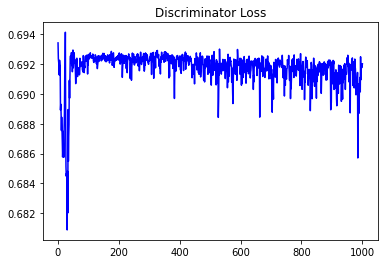

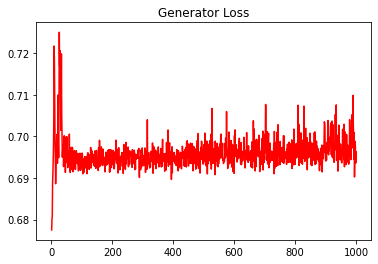

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.006598822013677386


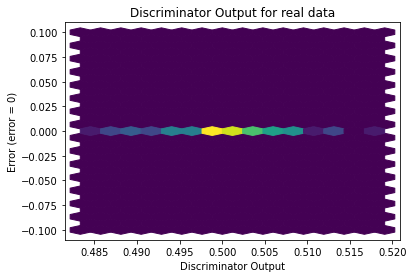

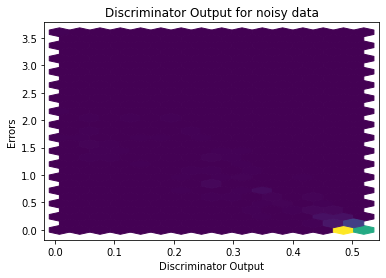

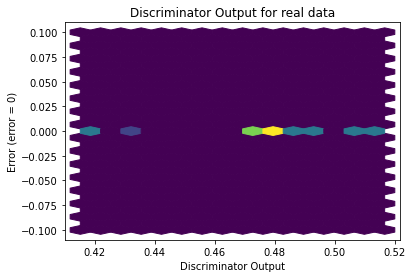

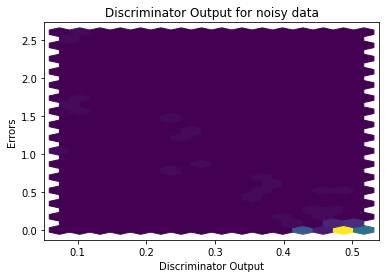

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5295]], requires_grad=True)
